# **Telecom Churn Analytics:**
## ***Building Predictive Models to Improve Customer Retention***

### Section 3: Data Visualization 🔍📈

---

### Objectives

In Section 3, the aim is to anaylsis and present using 3 different plotting tools: Matpotlib, Seaborn and plotly to visualize the anaylsis and proof the hypothesis made.


### Inputs

* 2 cleaned datasets prepared in the previous sections will be used. 
 *  [telecom_customer_churn_cleaned.csv](../dataset/processed/telecom_customer_churn_cleaned.csv)   
 *  [telecom_customer_churn_encoded.csv](../dataset/processed/telecom_customer_churn_encoded.csv)

### Business Requirements Recap

✅ Key Requirements
* Accurate Churn Prediction

    * Develop a model to predict whether a customer is likely to churn in the next billing cycle.

* Key Driver Identification

    * Pinpoint the most influential demographic and subscription attributes driving churn.

* Actionable Insights

    * Translate model outputs into retention strategies (e.g., targeted offers, loyalty programs).

* Seamless Integration

    * Deploy the model into existing CRM and marketing systems for real‑time use.

* Performance Metrics

    * Achieve at least X% recall on churners (to minimize missed at‑risk customers) while maintaining acceptable precision.


### Hypothesis

**H1:** Customers on **`month-to-month`** contracts are more likely to churn than those on annual contracts.

**H2:** Customers with longer **`tenure`** are less likely to churn.

**H3:** **`SeniorCitizen`** Customers are more likey to churn.

**H4:** Customers who use **`fiber optic`** internet services have higer churn rates.

**H5:** Internet Customers with add-ons services like **`OnlineSecurity`** and **`TechSupport`** are less likey to churn.



### Outputs

* Findings with various graphs by Matpotlib, Seaborn and plotly will be demonstrated through this Jupyter Notebook. All the result will be summarized in README.md below.
    * [README.md](../README.md)





---

### Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
print(f"You set a new current directory: {current_dir}")


You set a new current directory: /Users/denniskwok/Documents/data-analytics/telecom-churn-ml-prediction


---

## Part A

### Features Correlation Overview
### *Descriptive Analysis with Matplotlab and Seaborn*

#### **Load dataset**

In [12]:
import numpy as np
import pandas as pd

# Load datasets from csv files
df = pd.read_csv("dataset/processed/telecom_customer_churn_cleaned.csv")
df_encoded = pd.read_csv("dataset/processed/telecom_customer_churn_encoded.csv")

#### **Churn Drivers Overview**
##### 1. Top 10 Features Correlation with Churn**

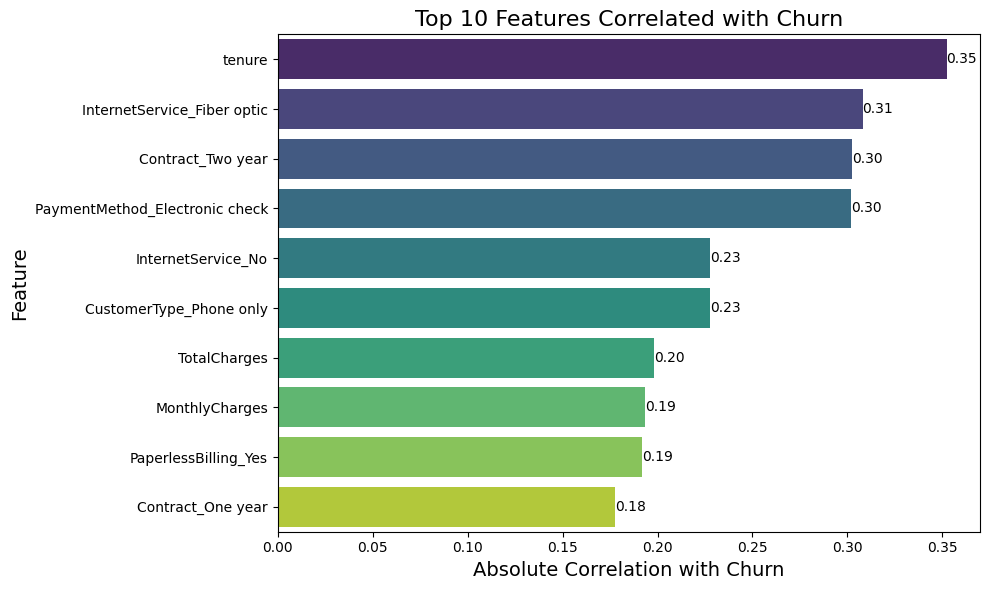

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List top 10 features correlated with churn
correlation_matrix = df_encoded.corr()
correlation_with_churn = correlation_matrix["Churn_Yes"].abs().sort_values(ascending=False)
top_10_features = correlation_with_churn.index[1:11]  # Exclude 'Churn_Yes' itself
top_10_values = correlation_with_churn.values[1:11]

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    "Feature": top_10_features,
    "Correlation": top_10_values
})

# Bar plot with hue assigned to 'Feature'
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=plot_df,
    x="Correlation",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.title("Top 10 Features Correlated with Churn", fontsize=16)
plt.xlabel("Absolute Correlation with Churn", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


#### 2. Top 5 Internet Add-on Services Correlation with Churn

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_87044/3448030606.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=addon_corr_internet.values, y=addon_corr_internet.index, palette="magma")


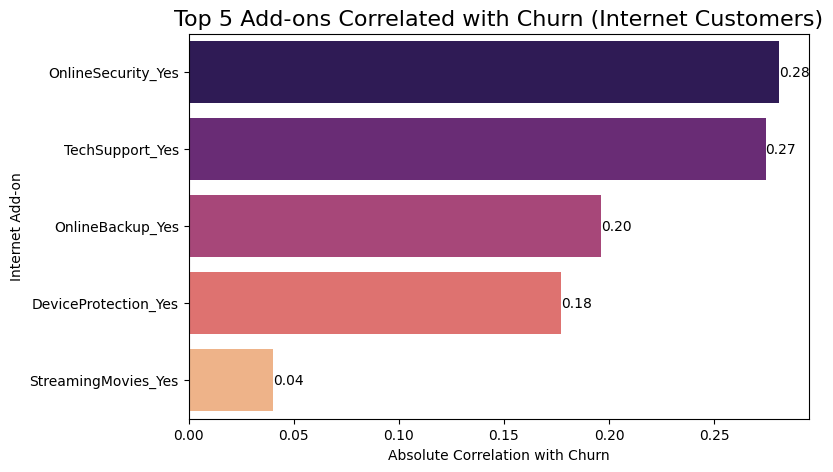

In [4]:
# Filter for customers with internet service
internet_customers = df_encoded[df_encoded["InternetService_No"] == 0]

# Recalculate correlation for add-ons with churn
add_on_cols = [
    "OnlineSecurity_Yes", "OnlineBackup_Yes", "DeviceProtection_Yes",
    "TechSupport_Yes", "StreamingTV_Yes", "StreamingMovies_Yes"
]
addon_corr_internet = internet_customers[add_on_cols + ["Churn_Yes"]].corr()["Churn_Yes"].abs().sort_values(ascending=False).head(6)
addon_corr_internet = addon_corr_internet.drop("Churn_Yes").head(5)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=addon_corr_internet.values, y=addon_corr_internet.index, palette="magma")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    
plt.title("Top 5 Add-ons Correlated with Churn (Internet Customers)", fontsize=16)
plt.xlabel("Absolute Correlation with Churn", fontsize=10)
plt.ylabel("Internet Add-on", fontsize=10)
plt.show()

##### **Tenure, Contract Type and Churn Analysis**

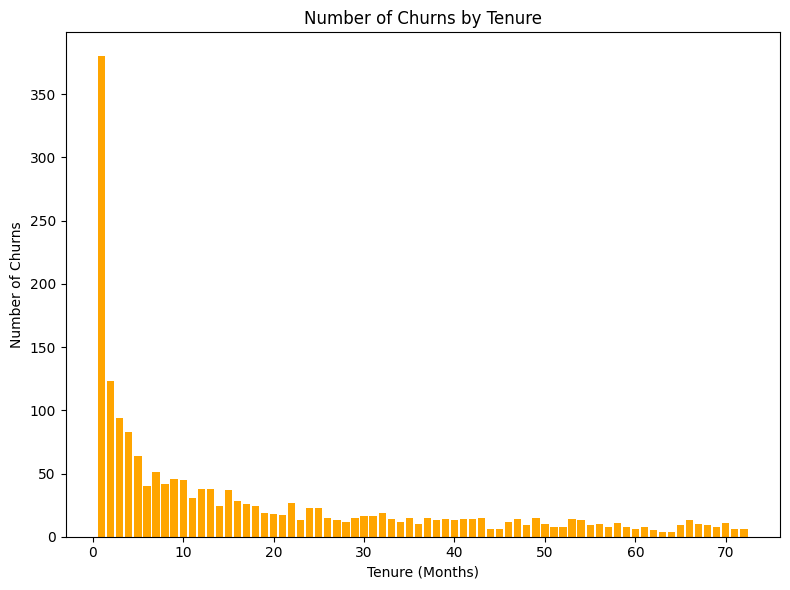

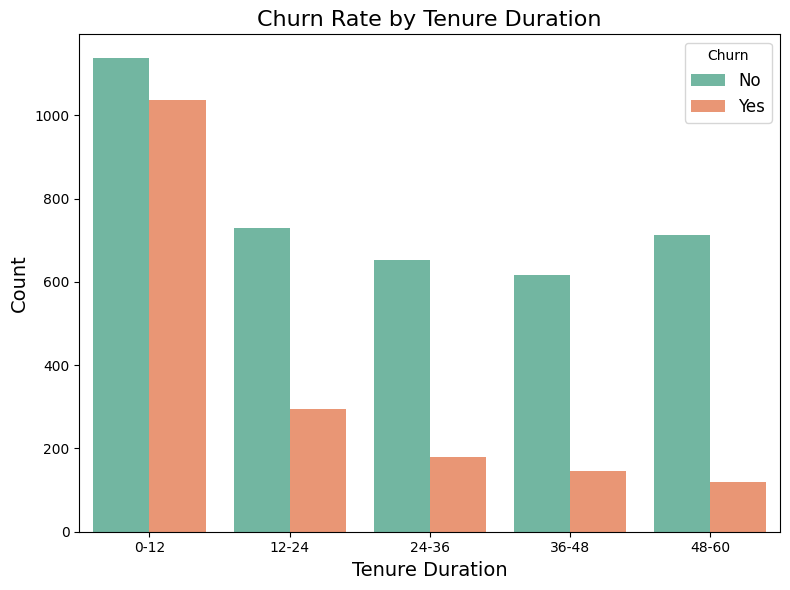

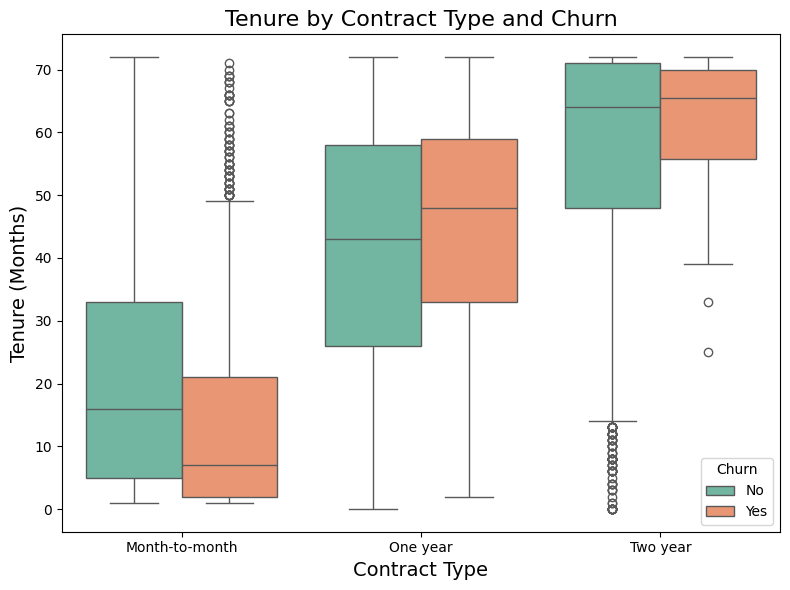

In [24]:
# Bar Plot for tenure vs Churn
churn_count = df[df["Churn"] == "Yes"].groupby("tenure").size()
plt.figure(figsize=(8, 6))
plt.bar(churn_count.index, churn_count.values, color='orange')
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Churns")
plt.title("Number of Churns by Tenure")
plt.tight_layout()
plt.show()

# Bar Plot for bin tenure_group vs Churn
df["tenure_group"] = pd.cut(df["tenure"], bins=[0, 12, 24, 36, 48, 60], labels=["0-12", "12-24", "24-36", "36-48", "48-60"])

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="tenure_group", hue="Churn", palette="Set2")
plt.title("Churn Rate by Tenure Duration", fontsize=16)    
plt.xlabel("Tenure Duration", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Churn", fontsize=12)
plt.tight_layout()
plt.show()

# box plots for tenure and contract type by churn
plt.figure(figsize=(8, 6))
sns.boxplot(x="Contract", y="tenure", hue="Churn", data=df, palette="Set2")
plt.title("Tenure by Contract Type and Churn", fontsize=16)
plt.xlabel("Contract Type", fontsize=14)
plt.ylabel("Tenure (Months)", fontsize=14)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

**Findings:**
* Most customer churn occurs within the first few months of tenure, indicating that new customers are at the highest risk of leaving early.
* The boxplot shows customers on month-to-month contracts have shorter tenure and much higher churn rates, while those on one-year or two-year contracts tend to stay longer and are less likely to churn.

#### **Senior Citizen Customer Analysis**
##### 1. Stacked bar chart for senior vs churn

In [38]:
import plotly.express as px

# Stacked bar chart for senior vs churn with plotly
selected_churn = ["No", "Yes"]
filtered_churn = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack().fillna(0).reset_index()

columns_to_keep = ["SeniorCitizen"] + selected_churn
filtered_churn = filtered_churn[columns_to_keep]
melted = filtered_churn.melt(id_vars="SeniorCitizen", value_vars=selected_churn,
                            var_name="Churn", value_name="Rate")
melted["SeniorCitizen"] = melted["SeniorCitizen"].map({0: "Non-Senior", 1: "Senior"})

fig3 = px.bar(melted, x="SeniorCitizen", y="Rate", color="Churn", barmode="stack",
            text="Rate", title="Churn Rate by Senior Status",
            labels={"Rate": "Proportion", "SeniorCitizen": "Customer Type"})
fig3.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig3.update_layout(yaxis_tickformat=".0%", yaxis_range=[0, 1], height=500)
fig3.show()

# Section: Service Usage by Senior Status and Churn Status
service_features = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection']
senior_services = df.groupby('SeniorCitizen')[service_features].apply(lambda x: x.eq('Yes').mean()).reset_index()
senior_services['SeniorCitizen'] = senior_services['SeniorCitizen'].map({0: 'Non-Senior', 1: 'Senior'})
melted_services = senior_services.melt(id_vars='SeniorCitizen', var_name='Service', value_name='UsageRate')

fig = px.bar(
    melted_services,
    x='Service',
    y='UsageRate',
    color='SeniorCitizen',
    barmode='group',
    title='🔍 Service Usage Comparison: Seniors vs Non-Seniors',
    labels={'UsageRate': 'Usage Rate'}
)
fig.update_traces(texttemplate='%{y:.1%}', textposition='outside')
fig.layout.height = 550
fig.update_layout(yaxis_tickformat=".0%")
fig.show()

Findings: 
* Senior customers have a higher churn rate than non-seniors and are less likely to use add-on services like Online Security, Tech Support.
* The lack of online security and tech support may induce a bad user experience, which leads to a higher churn rate among telecom customers, especially the senior customers.

#### **Internet Add-on services Analysis**
##### 1. Bar Plot for Number of Internet Serivce by Churn

In [ ]:
# Bar plot for NumInternetServices vs Churn rate
selected_churn = ["No", "Yes"]
filtered_df = df[df["InternetService"] != "No"]
filtered_churn = filtered_df.groupby("NumInternetServices")["Churn"].value_counts(normalize=True).unstack().fillna(0).reset_index()

# Melt the dataframe for plotly
melted_churn = filtered_churn.melt(id_vars="NumInternetServices", value_vars=selected_churn,
								   var_name="Churn", value_name="Rate")

import plotly.express as px
fig = px.bar(melted_churn, x="NumInternetServices", y="Rate", color="Churn",
			 barmode="group", title="Churn Rate vs Number of Internet Add-on Services",
			 labels={"Rate": "Churn Rate", "NumInternetServices": "Number of Internet Services"})
fig.update_traces(texttemplate='%{y:.1%}', textposition='outside')
fig.update_layout(yaxis_tickformat=".0%")
fig.show()

**Findings:**
* Apparently, more internet services subsription would increase the customer loyalty and retention. Customers with fewer or no internet add-on services have significantly higher churn rates.



Let's looks into online security and tech support further.

##### 2. Churn comparison by Online Security and Tech Support

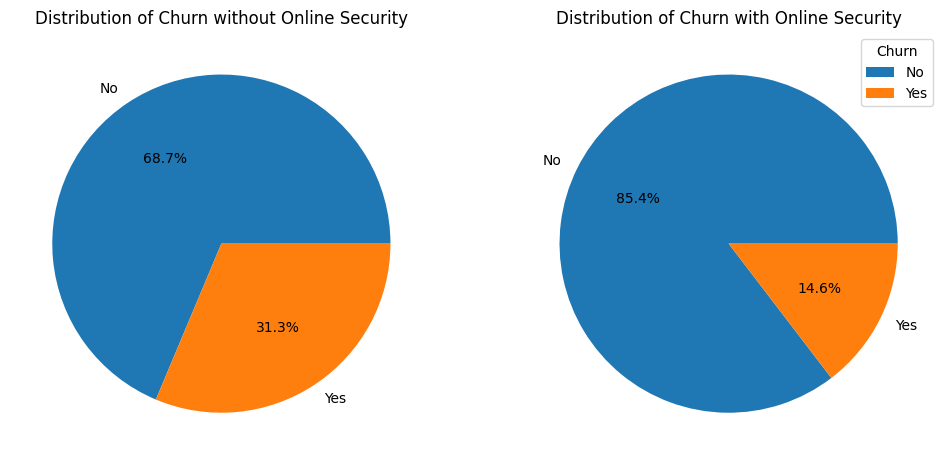

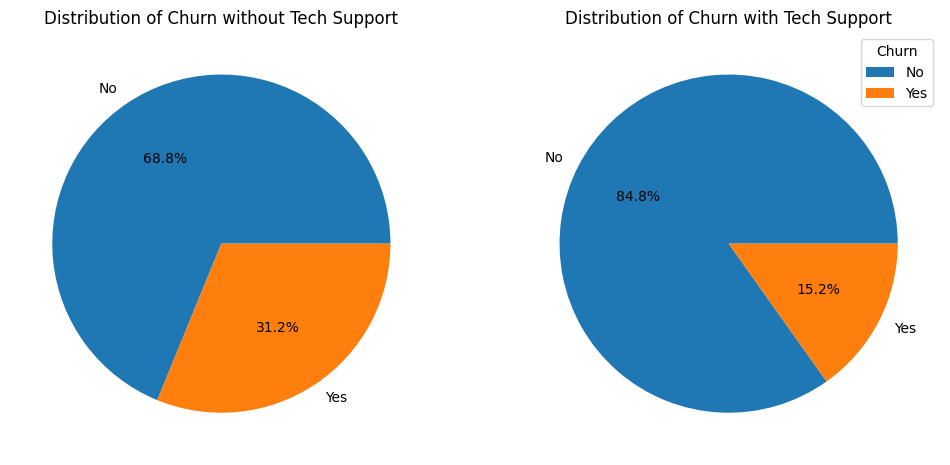

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable 'Churn' by online security feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
online_security_counts_no = df[df['OnlineSecurity'] == "No"]['Churn'].value_counts()
plt.pie(online_security_counts_no.values, labels=online_security_counts_no.index, autopct='%1.1f%%')
plt.title('Distribution of Churn without Online Security')
plt.subplot(1, 2, 2)
online_security_counts = df[df['OnlineSecurity'] == "Yes"]['Churn'].value_counts()
plt.pie(online_security_counts.values, labels=online_security_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Churn with Online Security')
plt.legend(title='Churn')
plt.show()

# Distribution of the target variable 'Churn' by tech support feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
tech_support_counts_no = df[df['TechSupport'] == "No"]['Churn'].value_counts()
plt.pie(tech_support_counts_no.values, labels=tech_support_counts_no.index, autopct='%1.1f%%')
plt.title('Distribution of Churn without Tech Support')
plt.subplot(1, 2, 2)
tech_support_counts = df[df['TechSupport'] == "Yes"]['Churn'].value_counts()
plt.pie(tech_support_counts.values, labels=tech_support_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Churn with Tech Support')
plt.legend(title='Churn')
plt.show()

Findings:
* Customers without Online Security or Tech Support have significantly higher churn rates compared to those with these add-on services.
* The pie charts show that churn is much more prevalent among customers who do not subscribe to Online Security or Tech Support.
* Customers with Online Security: Only about 14.6% churn, while those without: about 31.3% churn.
* Customers with Tech Support: Only about 15.2% churn, while those without: about 31.2% churn.
* This suggests that offering or promoting these add-on services may help reduce customer churn.


---

## Part B

### Further Observation with Interactive Graphs
### *Plotly application*

---

In the next section, we will train the ML model for churn prediction.